Test Name | Description
--- | ---
Major28_2016-2019_1entry | Test with initial pass at refactor and single entry per setup
Major28_2016-2019_v2 | add filter for spread:ATR ratio

In [1]:
import pytools.leantools as lt
import pandas as pd
import os
from IPython.display import display

In [2]:
script_dir = os.path.abspath('') #<-- absolute dir the script is in
result_dir = os.path.join (script_dir, "../results/parallax/backtest5")
test_name="ParallaxManualAlgorithm"
algo_result_filepath = os.path.join(result_dir, f'{test_name}.json')
analysis_data_filepath = os.path.join(result_dir, f'{test_name}-analysis_data.json')
SYMBOLS = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'USDCAD', 'AUDUSD', 'NZDUSD']
analysis_file_suffix = "-analysis_data"


In [22]:
# Print high level stats

stat_columns = ['TradeStats.TotalNumberOfTrades', 
             'TradeStats.ProfitLossRatio', 
             'PortfolioStats.AverageWinRate', 
             'PortfolioStats.AverageLossRate',
             'PortfolioStats.WinRate',
             'PortfolioStats.Drawdown',
            'PortfolioStats.TotalNetProfit']

def format_stats(stats_df):
    result = stats_df.transpose()
    result.loc['PortfolioStats.AverageWinRate'] = result.loc['PortfolioStats.AverageWinRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.AverageLossRate'] = result.loc['PortfolioStats.AverageLossRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.WinRate'] = result.loc['PortfolioStats.WinRate'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.Drawdown'] = result.loc['PortfolioStats.Drawdown'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.TotalNetProfit'] = result.loc['PortfolioStats.TotalNetProfit'].apply('{:,.2%}'.format)
    return result

def get_stats(symbols, timeframe):
    stats_list = []
    for s in symbols:
        name = f'{s}-{timeframe}'
        path = os.path.join(result_dir, f'{name}.json')
        stats = lt.get_trade_statistics(path)
        stats = stats[stat_columns]
        stats.rename(index={0:name}, inplace=True)
        stats_list.append(stats)

stats = lt.get_trade_statistics(algo_result_filepath)
stats = stats[stat_columns]
format_stats(stats)


,0
TradeStats.TotalNumberOfTrades,282
TradeStats.ProfitLossRatio,2.7046
PortfolioStats.AverageWinRate,1.38%
PortfolioStats.AverageLossRate,-0.51%
PortfolioStats.WinRate,38.4%
PortfolioStats.Drawdown,10.5%
PortfolioStats.TotalNetProfit,81.49%


https://stackoverflow.com/questions/38107304/pandas-changing-a-specific-row-to-percentages

In [4]:
bar_data_df = lt.get_bar_data_df(analysis_data_filepath)
bar_data_df['ratioTop'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['top'], axis = 1)
bar_data_df['ratioBody'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['body'], axis = 1)
bar_data_df['ratioBottom'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['bottom'], axis = 1)

In [5]:
bar_data_df

,,BBMid,BBUpper,BBLower,StochK,StochD,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom
Symbol,Time,,,,,,,,,,,,,,
AUDCAD,2016-12-27 22:00:00+00:00,0.9801,0.9953,0.9649,23.5477,19.7297,65.4,0.975415,0.979515,0.972365,0.973270,7.8,0.573427,0.300000,0.126573
AUDCHF,2016-12-27 22:00:00+00:00,0.7492,0.7650,0.7335,11.0379,9.7023,60.1,0.738575,0.741600,0.737850,0.738105,5.5,0.806667,0.125333,0.068000
AUDJPY,2016-12-27 22:00:00+00:00,85.2498,86.9273,83.5724,7.8004,9.6487,80.5,84.366500,84.866000,84.100000,84.162000,4.6,0.652089,0.266971,0.080940
AUDNZD,2016-12-27 22:00:00+00:00,1.0443,1.0506,1.0380,28.0652,38.4666,60.9,1.042805,1.044095,1.036710,1.037100,14.6,0.174678,0.772512,0.052810
AUDUSD,2016-12-27 22:00:00+00:00,0.7347,0.7591,0.7102,5.2073,5.0278,63.7,0.718445,0.721980,0.716380,0.717745,2.5,0.631250,0.125000,0.243750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NZDJPY,2019-12-30 22:00:00+00:00,72.0626,73.6051,70.5200,88.7593,91.9691,50.8,73.253500,73.368500,72.997000,73.111500,12.5,0.309556,0.382234,0.308210
NZDUSD,2019-12-30 22:00:00+00:00,0.6605,0.6726,0.6484,93.2232,94.0295,41.2,0.672795,0.675575,0.671370,0.672915,3.5,0.632580,0.028537,0.338882
USDCAD,2019-12-30 22:00:00+00:00,1.3160,1.3293,1.3026,10.5644,12.1195,56.3,1.306935,1.306965,1.295170,1.299045,4.5,0.002543,0.668928,0.328529


In [6]:
closed_trades = lt.get_closed_trades_df(algo_result_filepath).drop(columns=['Direction', 'TotalFees', 'MAE', 'MFE', 'Symbol.ID', 'Symbol.Permtick'])
#closed_trades

Grab the trade signals

In [20]:
def get_r_multiple(row):
    if row.slPips != 0:
        return row.plPips / row.slPips
    else:
        return 0

trade_setups_df = lt.get_trade_setups_df(analysis_data_filepath)
# calculate some additional data
trade_setups_df['year'] = trade_setups_df.apply(lambda row: row.name.year, axis = 1)
trade_setups_df['weekday'] = trade_setups_df.apply(lambda row: row.name.weekday(), axis = 1)
trade_setups_df['RMultiple'] = trade_setups_df.apply(get_r_multiple, axis = 1)


#pd.set_option('display.max_rows', 500)
#display(trade_setups_df)
trade_setups_df.reset_index(inplace=True)
trade_setups_df.style
trade_setups_df.to_csv("test.csv")
#pd.reset_option('display.max_rows')

In [8]:
# Show R multiple grouped by symbol
r_by_symbol = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['symbol']).sum()
r_by_symbol.sort_values('RMultiple').style.hide_columns(['year', 'tradeIndex'])

,entryPrice,slPrice,tpPrice,fillPrice,canceled,slPips,tpPips,plPips,weekday,RMultiple
symbol,,,,,,,,,,
USDCHF,6.934960,6.945870,6.905660,6.935010,False,201.300000,560.800000,-201.200000,12,-6.996013
NZDCHF,3.319360,3.323400,3.309680,3.319360,False,136.200000,374.600000,-136.200000,10,-5.000000
NZDCAD,3.619770,3.607800,3.654060,3.619770,False,119.700000,342.900000,-120.100000,16,-4.013085
AUDNZD,7.538480,7.550580,7.507540,7.538480,False,301.800000,820.200000,-82.200000,33,-3.829324
NZDJPY,594.376000,594.624000,592.923000,594.376000,False,272.400000,715.100000,105.500000,21,-2.795925
GBPCHF,2.634190,2.622540,2.666900,2.634190,False,116.500000,327.100000,-116.500000,6,-2.000000
EURCAD,7.558510,7.527390,7.642300,7.558510,False,311.200000,837.900000,-79.500000,8,-1.704125
EURNZD,13.284630,13.316680,13.205200,13.284630,False,441.700000,1141.500000,221.100000,9,-1.206593
GBPAUD,28.298950,28.359820,28.128940,28.298950,False,1505.100000,4190.900000,-371.000000,32,-0.497297


In [9]:
sum_r_group = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['year','weekday'])[['RMultiple']].sum()
#sum_r_group.plot(kind='bar', figsize=(20,5))

#pd.set_option('display.max_rows', 500)
display(sum_r_group)
#pd.reset_option('display.max_rows')

RMultiple
year weekday           
2017 0         0.269740
     1         8.748530
     2        -2.610429
     3        23.375745
     6        21.297895
2018 0         9.769249
     1       -19.093585
     2        40.730360
     3       -11.106768
     6         8.509714
2019 0       -11.299921
     1        15.975728
     2        -2.181205
     3        13.898593
     6        28.223986

In [10]:
# Combine signal data with closed trade data
merged_trade_data = trade_setups_df.join(closed_trades, on='tradeIndex')
merged_trade_data

,BarTime,symbol,direction,entryPrice,slPrice,tpPrice,entryTime,fillPrice,closeTime,canceled,...,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value
0,2017-01-22 22:00:00+00:00,AUDCAD,Sell,1.00462,1.00862,0.99531,2017-01-23T22:55:00Z,1.00462,2017-01-25T00:32:00Z,False,...,2.327500,2017-01-23T22:55:00Z,1.00462,163015.0,2017-01-25T00:32:00Z,0.99531,1153.12,1.01:37:00,-252.05,AUDCAD
1,2017-01-22 22:00:00+00:00,AUDCAD,Sell,1.00571,1.00862,0.99531,2017-01-24T11:57:00Z,1.00571,2017-01-25T00:32:00Z,False,...,3.573883,2017-01-24T11:57:00Z,1.00571,224075.0,2017-01-25T00:32:00Z,0.99531,1770.61,12:35:00,-346.46,AUDCAD
2,2017-01-22 22:00:00+00:00,USDCAD,Sell,1.32489,1.33104,1.31074,2017-01-24T07:51:00Z,1.32489,2017-01-25T12:18:00Z,False,...,2.300813,2017-01-24T07:51:00Z,1.32489,106026.0,2017-01-25T12:18:00Z,1.31074,1144.98,1.04:27:00,-36.01,USDCAD
3,2017-01-22 22:00:00+00:00,USDCAD,Sell,1.32655,1.33104,1.31074,2017-01-24T07:58:00Z,1.32655,2017-01-25T12:18:00Z,False,...,3.521158,2017-01-24T07:58:00Z,1.32655,145225.0,2017-01-25T12:18:00Z,1.31074,1752.28,1.04:20:00,-49.32,USDCAD
4,2017-01-23 22:00:00+00:00,NZDCAD,Sell,0.95525,0.96069,0.94269,0001-01-01T00:00:00,0.00000,2017-01-25T17:25:00Z,True,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2019-11-20 22:00:00+00:00,EURUSD,Sell,1.10703,1.10874,1.10072,2019-11-22T06:46:00Z,1.10703,2019-11-22T08:31:00Z,False,...,-1.000000,2019-11-22T06:46:00Z,1.10703,538748.0,2019-11-22T08:31:00Z,1.10874,-921.26,01:45:00,-1530.05,EURUSD
344,2019-12-09 22:00:00+00:00,EURGBP,Buy,0.84234,0.84050,0.84681,0001-01-01T00:00:00,0.00000,2019-12-10T22:12:00Z,True,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,2019-12-09 22:00:00+00:00,EURGBP,Buy,0.84182,0.84050,0.84681,0001-01-01T00:00:00,0.00000,2019-12-10T22:12:00Z,True,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,2019-12-16 22:00:00+00:00,NZDJPY,Sell,72.01000,72.26300,71.40800,2019-12-18T12:37:00Z,72.01000,2019-12-18T21:46:00Z,False,...,-1.201581,2019-12-18T12:37:00Z,72.01000,395796.0,2019-12-18T21:46:00Z,72.31400,-1098.11,09:09:00,-1269.69,NZDJPY


In [11]:
merged_trade_data.reset_index(inplace=True)
merged_trade_data.set_index(['symbol', 'BarTime'])

index direction  entryPrice   slPrice  \
symbol BarTime                                                            
AUDCAD 2017-01-22 22:00:00+00:00      0      Sell     1.00462   1.00862   
       2017-01-22 22:00:00+00:00      1      Sell     1.00571   1.00862   
USDCAD 2017-01-22 22:00:00+00:00      2      Sell     1.32489   1.33104   
       2017-01-22 22:00:00+00:00      3      Sell     1.32655   1.33104   
NZDCAD 2017-01-23 22:00:00+00:00      4      Sell     0.95525   0.96069   
...                                 ...       ...         ...       ...   
EURUSD 2019-11-20 22:00:00+00:00    343      Sell     1.10703   1.10874   
EURGBP 2019-12-09 22:00:00+00:00    344       Buy     0.84234   0.84050   
       2019-12-09 22:00:00+00:00    345       Buy     0.84182   0.84050   
NZDJPY 2019-12-16 22:00:00+00:00    346      Sell    72.01000  72.26300   
       2019-12-16 22:00:00+00:00    347      Sell    72.08000  72.26300   

                                   tpPrice             entryTime  fillPrice  \
symbol BarTime                                                                
AUDCAD 2017-01-22 22:00:00+00:00   0.99531  2017-01-23T22:55:00Z    1.00462   
       2017-01-22 22:00:00+00:00   0.99531  2017-01-24T11:57:00Z    1.00571   
USDCAD 2017-01-22 22:00:00+00:00   1.31074  2017-01-24T07:51:00Z    1.32489   
       2017-01-22 22:00:00+00:00   1.31074  2017-01-24T07:58:00Z    1.32655   
NZDCAD 2017-01-23 22:00:00+00:00   0.94269   0001-01-01T00:00:00    0.00000   
...                                    ...                   ...        ...   
EURUSD 2019-11-20 22:00:00+00:00   1.10072  2019-11-22T06:46:00Z    1.10703   
EURGBP 2019-12-09 22:00:00+00:00   0.84681   0001-01-01T00:00:00    0.00000   
       2019-12-09 22:00:00+00:00   0.84681   0001-01-01T00:00:00    0.00000   
NZDJPY 2019-12-16 22:00:00+00:00  71.40800  2019-12-18T12:37:00Z   72.01000   
       2019-12-16 22:00:00+00:00  71.40800  2019-12-18T14:53:00Z   72.08000   

                                             closeTime  canceled  slPips  ...  \
symbol BarTime                                                            ...   
AUDCAD 2017-01-22 22:00:00+00:00  2017-01-25T00:32:00Z     False    40.0  ...   
       2017-01-22 22:00:00+00:00  2017-01-25T00:32:00Z     False    29.1  ...   
USDCAD 2017-01-22 22:00:00+00:00  2017-01-25T12:18:00Z     False    61.5  ...   
       2017-01-22 22:00:00+00:00  2017-01-25T12:18:00Z     False    44.9  ...   
NZDCAD 2017-01-23 22:00:00+00:00  2017-01-25T17:25:00Z      True    54.4  ...   
...                                                ...       ...     ...  ...   
EURUSD 2019-11-20 22:00:00+00:00  2019-11-22T08:31:00Z     False    17.1  ...   
EURGBP 2019-12-09 22:00:00+00:00  2019-12-10T22:12:00Z      True    18.4  ...   
       2019-12-09 22:00:00+00:00  2019-12-10T22:12:00Z      True    13.2  ...   
NZDJPY 2019-12-16 22:00:00+00:00  2019-12-18T21:46:00Z     False    25.3  ...   
       2019-12-16 22:00:00+00:00  2019-12-18T21:46:00Z     False    18.3  ...   

                                  RMultiple             EntryTime  EntryPrice  \
symbol BarTime                                                                  
AUDCAD 2017-01-22 22:00:00+00:00   2.327500  2017-01-23T22:55:00Z     1.00462   
       2017-01-22 22:00:00+00:00   3.573883  2017-01-24T11:57:00Z     1.00571   
USDCAD 2017-01-22 22:00:00+00:00   2.300813  2017-01-24T07:51:00Z     1.32489   
       2017-01-22 22:00:00+00:00   3.521158  2017-01-24T07:58:00Z     1.32655   
NZDCAD 2017-01-23 22:00:00+00:00   0.000000                   NaN         NaN   
...                                     ...                   ...         ...   
EURUSD 2019-11-20 22:00:00+00:00  -1.000000  2019-11-22T06:46:00Z     1.10703   
EURGBP 2019-12-09 22:00:00+00:00   0.000000                   NaN         NaN   
       2019-12-09 22:00:00+00:00   0.000000                   NaN         NaN   
NZDJPY 2019-12-16 22:00:00+00:00  -1.201581  2019-12-18T12:37:00Z    72.01000   
    

https://pandas.pydata.org/docs/user_guide/merging.html#timeseries-friendly-merging

In [12]:
# Merge trade data with bar data

# only grab attempted trades
attempted_trades = merged_trade_data[(merged_trade_data['slPips'] > 0)]
merged_setups = pd.merge(attempted_trades, bar_data_df, left_on=['symbol', 'BarTime'], right_on=['Symbol','Time'])
#merged_setups = pd.merge(attempted_trades, bar_data_df, left_index=True, right_on=['Symbol','Time'])

#merged_setups['range'] = merged_setups.apply(lambda row: (row.H - row.L) / 0.0001, axis = 1)
#merged_setups['rangeAtrRatio'] = merged_setups.apply(lambda row: row.range / row.atrPips, axis = 1)

# Calculate direction wick
def get_direction_wick(row):
    if row.direction == 'Sell':
        return row.ratioBottom
    else:
        return row.ratioTop
merged_setups['directionWickRatio'] = merged_setups.apply(get_direction_wick, axis=1)

# Calculate middle bb distance
def get_midbb_dist(row):
    if row.direction == 'Sell':
        return lt.invLerp(row.BBUpper, row.BBMid, row.C)
    else:
        return lt.invLerp(row.BBLower, row.BBMid, row.C)
    
merged_setups['bbMidDist'] = merged_setups.apply(get_midbb_dist, axis=1)

merged_setups['bodyAtrRatio'] = merged_setups.apply(lambda row: (abs(row.O - row.C) / lt.getPipSize(row.symbol)) / row.atrPips, axis=1)

def color_returns(val):
    if val <= 0:
        return 'color: red'
    else:
        return 'color: green'

merged_setups.reset_index()
merged_setups.set_index(['symbol', 'BarTime'])
#merged_setups.style.applymap(color_returns, subset=['RMultiple'])    
#merged_setups.style.hide_columns(['year', 'EntryTime', 'Quantity'])

#formatted = merged_setups[['symbol', 'RMultiple', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom', 'directionWickRatio']]
#formatted.style.applymap(color_returns, subset=['RMultiple'])

merged_setups['spreadAtrRatio'] = merged_setups.apply(lambda row: row.spread / row.atrPips, axis=1)
merged_setups[merged_setups['spread'] >= merged_setups['slPips']][['BarTime', 'symbol', 'atrPips', 'spread', 'slPips', 'RMultiple', 'spreadAtrRatio']].style
merged_setups.apply(lambda row: row.slPips - row.spread, axis=1).describe()

count    348.000000
mean      33.541667
std       25.061736
min       -6.400000
25%       18.175000
50%       26.950000
75%       41.550000
max      189.800000
dtype: float64

In [13]:
#merged_closed_trades = merged_setups
merged_setups = merged_setups[(merged_setups['tradeIndex'] >= 0)]
winning_trades = merged_setups[(merged_setups['plPips'] > 0)]
losing_trades = merged_setups[(merged_setups['plPips'] < 0)]
describeColumns = ['slPips', 'tpPips', 'atrPips', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom']
winning_trades_desc = winning_trades.describe()[describeColumns]
losing_trades_desc = losing_trades.describe()[describeColumns]

#print(len(winning_trades))
#print(len(losing_trades))
#merged_setups[(merged_setups['RMultiple'] > -0.5) & (merged_setups['RMultiple'] < 0.5)]

102.8214864726224

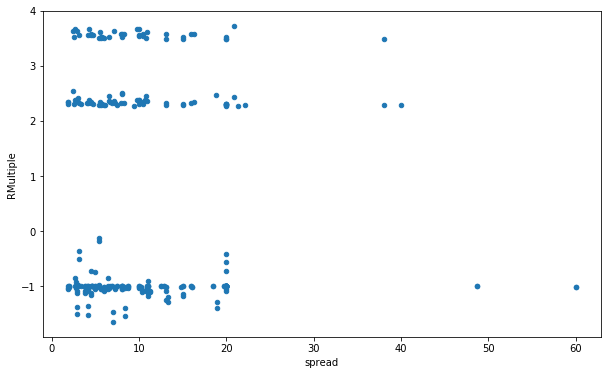

In [14]:
#winning_trades.bbMidDist.plot.hist(bins=50)
#merged_setups[merged_setups['spread'] >= 25]
merged_setups.plot.scatter(x='spread', y='RMultiple', figsize=(10,6))
merged_setups[merged_setups['bodyAtrRatio'] > 0.33].RMultiple.sum()

0.0

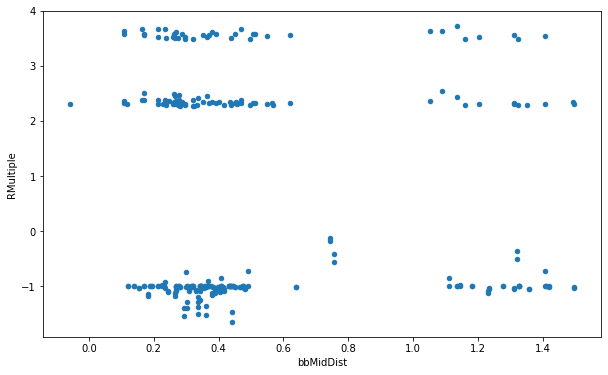

In [15]:
merged_setups.plot.scatter(x='bbMidDist', y='RMultiple', figsize=(10,6))
merged_setups[merged_setups['bbMidDist'] > 2].RMultiple.sum()

-31.006170037906582

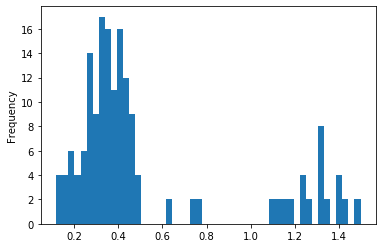

In [16]:
losing_trades.bbMidDist.plot.hist(bins=50)
losing_trades[losing_trades['bbMidDist'] >= 0.9].RMultiple.sum()

83.30344865922358

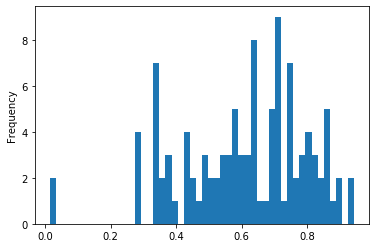

In [17]:
#winning_trades_desc
#winning_trades
winning_trades.ratioBody.plot.hist(bins=50)
winning_trades[winning_trades['ratioBody'] < 0.5].RMultiple.sum()

In [18]:
#todo: look at size relative to ATR